In [ ]:
%pip install xlrd
import pandas as pd

In [ ]:
# load data
df = pd.read_excel("Data/titanic3.xls")
df

In [ ]:
# show missing data
df.isna().sum()

In [ ]:
# show non-numeric columns
df.dtypes

In [ ]:
df.columns

In [ ]:
def clean_data(dataframe):
    return (dataframe
            .loc[:, ['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare']]
            .dropna()
            )
clean_data(df)

In [ ]:
# standardize the data
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
set_config(transform_output='pandas')
scaler = StandardScaler()
X = scaler.fit_transform(clean_data(df))
X

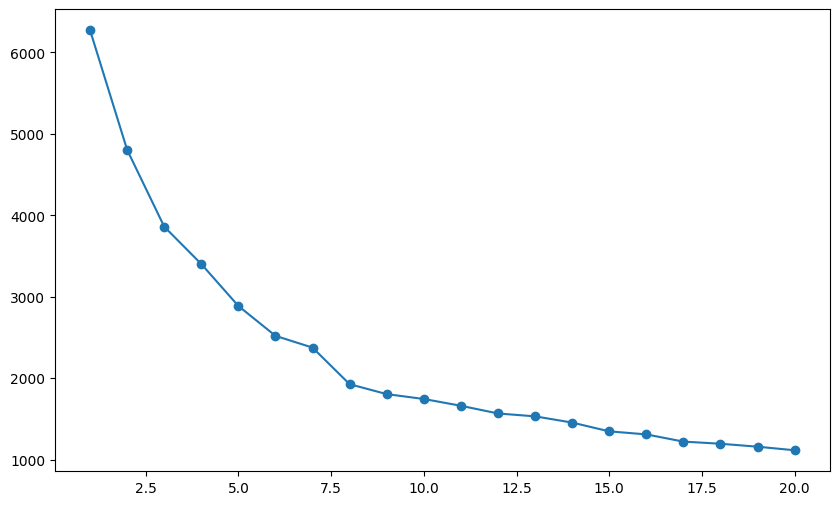

In [18]:
# we determine the number of clusters using the elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
interias = []
for i in range(20):
    kmeans = KMeans(n_clusters=i+1, n_init=1, max_iter=300, random_state=42)
    kmeans.fit(X)
    interias.append(kmeans.inertia_)

# plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), interias, marker='o')

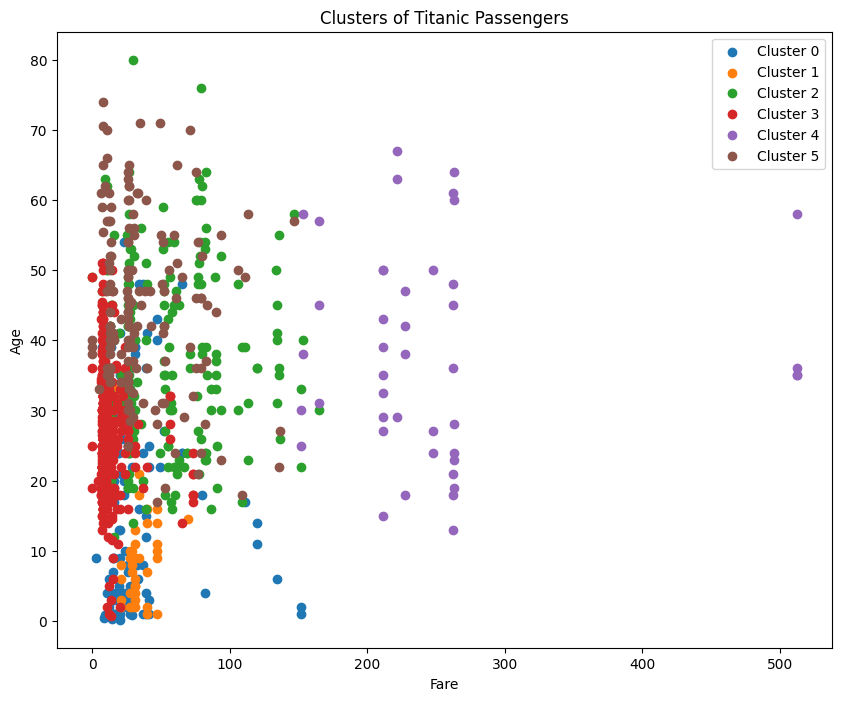

In [23]:
import numpy as np

# run the algorithm again with the optimal number of clusters
optimal_k = 6
final_kmeans = KMeans(n_clusters=optimal_k, n_init=1, max_iter=300, random_state=42)
final_kmeans.fit(X)
# get the cluster labels for each data point
labels = final_kmeans.labels_

# add cluster labels back to the original dataframe
df_clean = clean_data(df).copy()
df_clean['cluster'] = labels

# create a scatter plot of two important features colored by cluster
plt.figure(figsize=(10, 8))
for cluster_num in range(optimal_k):
    cluster_data = df_clean[df_clean['cluster'] == cluster_num]
    plt.scatter(cluster_data['fare'], cluster_data['age'], 
                label=f'Cluster {cluster_num}')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Clusters of Titanic Passengers')
plt.legend()
plt.show()